# Comparison between Random ECM and Voronoi Tessellation

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# read results from csv
df = pd.read_csv('uniform_50_runs_1500_iters_app_-0.1_api_-0.02_bii_0.1_bip_0.02_L_101.csv')
df_v = pd.read_csv('voronoi_50_runs_1500_iters_app_-0.1_api_-0.02_bii_0.1_bip_0.02_L_101.csv')
dfs = {'random':df, 'voronoi':df_v}

In [71]:
def plot_with_CI(mean, CI, **kwargs):
    plt.plot(mean, **kwargs)
    plt.fill_between(range(len(mean)), mean - CI, mean + CI, alpha=0.2)
    plt.grid(alpha=0.2)
    plt.xlabel('iteration', fontsize=18)
    return mean, CI

## Absolute and fractional cell counts

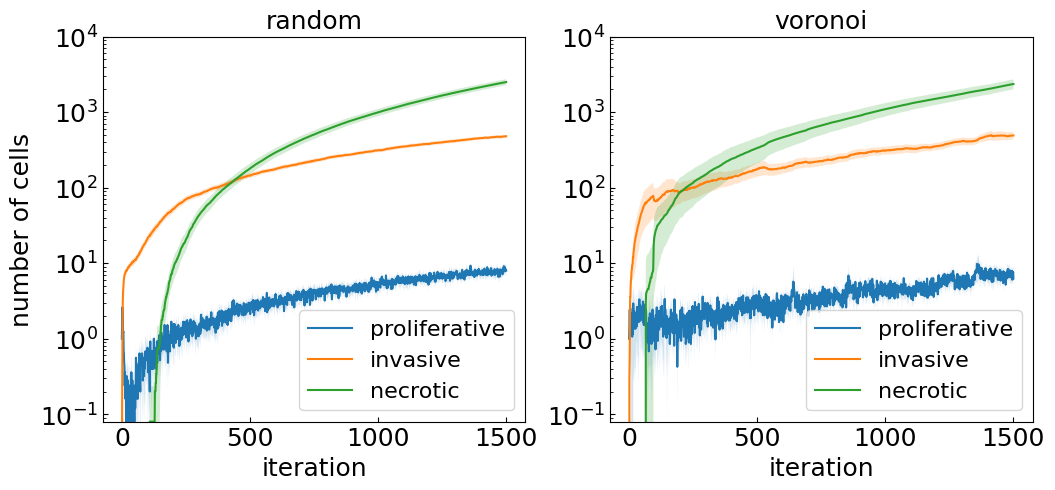

In [82]:
plt.figure(figsize=(12,5))
titles = ['random', 'voronoi']
for i, key in enumerate(dfs):

    plt.subplot(121+i)
    plt.title(titles[i], fontsize=18)
    plot_with_CI(dfs[key]['P_count'], dfs[key]['P_count_conf'], label='proliferative')
    plot_with_CI(dfs[key]['I_count'], dfs[key]['I_count_conf'], label='invasive')
    plot_with_CI(dfs[key]['N_count'], dfs[key]['N_count_conf'], label='necrotic')
    plt.ylabel('number of cells', fontsize=18) if i == 0 else None
    plt.xlabel('iteration', fontsize=18)

    plt.tick_params(which='both', direction='in')
    plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
    yticks = np.logspace(-1, 4, 4)
    plt.ylim(0.08, 10**4)
    plt.yticks(ticks=yticks, labels = yticks, fontsize=18)
    plt.legend(loc='lower right', fontsize=16)
    plt.grid()
    plt.yscale('log')

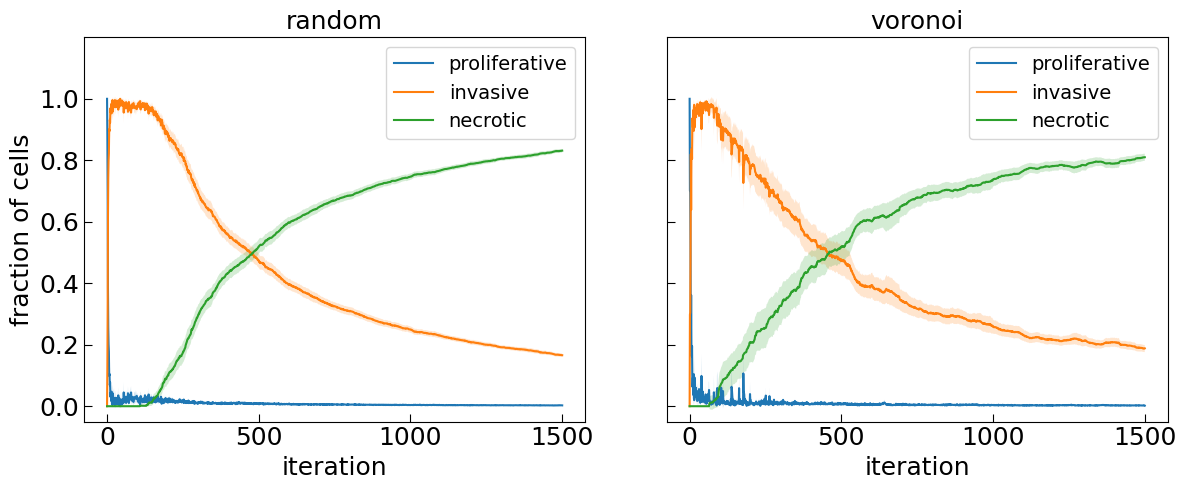

In [83]:
plt.figure(figsize=(12,5))

for i, key in enumerate(dfs):

    plt.subplot(121+i)
    plt.title(titles[i], fontsize=18)
    plot_with_CI(dfs[key]['P_fraction'], dfs[key]['P_fraction_conf'], label='proliferative')
    plot_with_CI(dfs[key]['I_fraction'], dfs[key]['I_fraction_conf'], label='invasive')
    plot_with_CI(dfs[key]['N_fraction'], dfs[key]['N_fraction_conf'], label='necrotic')
    plt.ylabel('fraction of cells', fontsize=18) if i == 0 else None
    plt.xlabel('iteration', fontsize=18)

    plt.tick_params(which='both', direction='in', size=6)
    plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
    plt.ylim(-0.05, 1.2)
    ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    labels = ticks if i == 0 else []
    plt.yticks(ticks=ticks, labels=labels, fontsize=18)
    plt.legend(loc='upper right', fontsize=14)
    plt.grid()
plt.tight_layout(w_pad=5)
plt.savefig('fraction_cells.png', dpi=300)

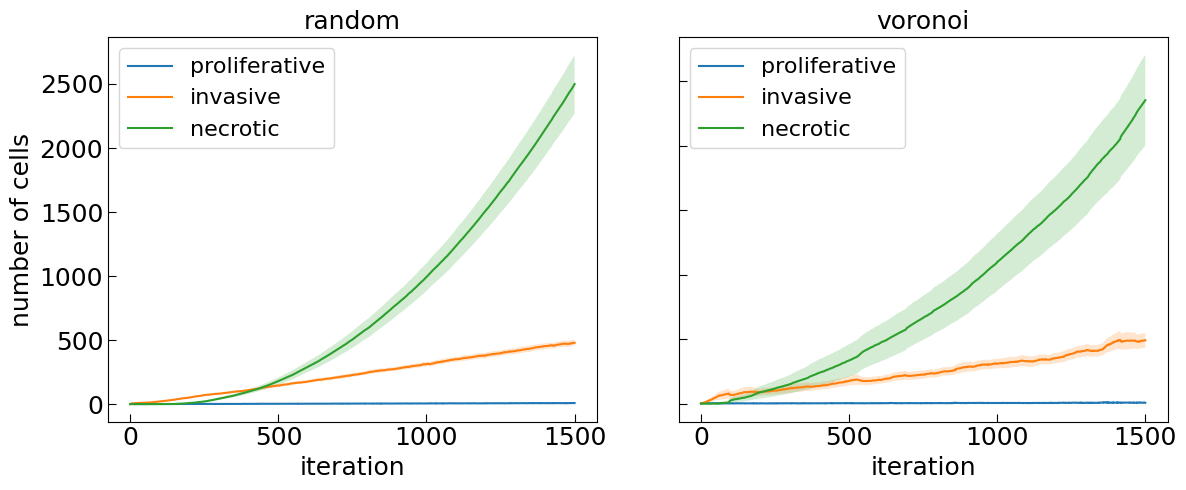

In [90]:
plt.figure(figsize=(12,5))

for i, key in enumerate(dfs):

    plt.subplot(121+i)
    plt.title(titles[i], fontsize=18)
    plot_with_CI(dfs[key]['P_count'], dfs[key]['P_count_conf'], label='proliferative')
    plot_with_CI(dfs[key]['I_count'], dfs[key]['I_count_conf'], label='invasive')
    plot_with_CI(dfs[key]['N_count'], dfs[key]['N_count_conf'], label='necrotic')
    plt.ylabel('number of cells', fontsize=18) if i == 0 else None
    plt.xlabel('iteration', fontsize=18)

    plt.tick_params(which='both', direction='in', size=6)
    plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
    ticks = np.arange(0, 2600, 500)
    labels = ticks if i == 0 else []
    plt.yticks(ticks, labels, fontsize=18)
    plt.legend(loc='upper left', fontsize=16)
    plt.grid()

plt.tight_layout(w_pad=5)
plt.savefig('absolute_counts.png', dpi=300)

## Radial growth

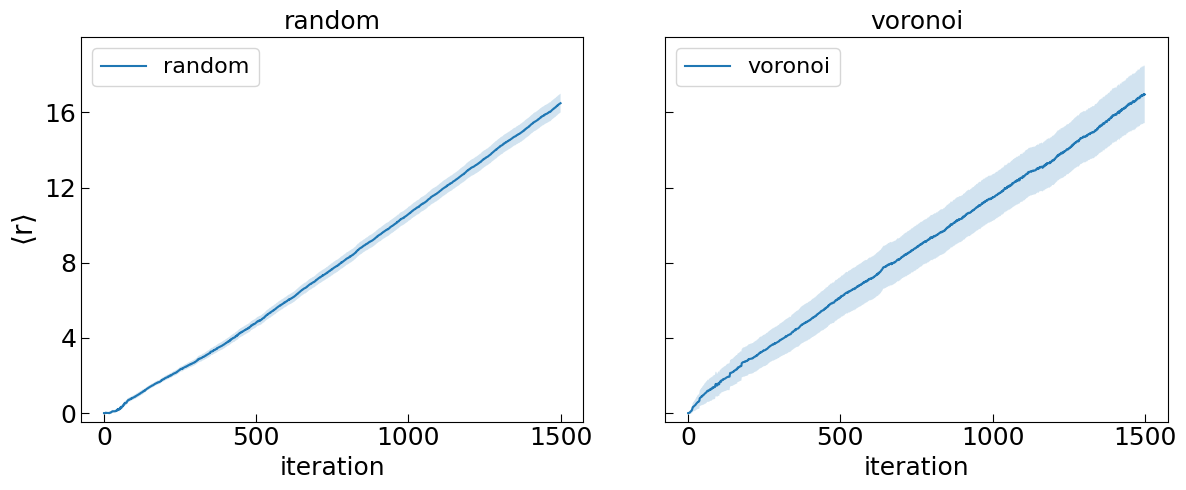

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title(titles[0], fontsize=18)
plot_with_CI(df['radius'], df['radius_conf'], label='random')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('$\langle$r$\\rangle$', fontsize=20)
plt.ylim(-0.45, 20)
plt.tick_params(direction='in', size=6)
plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
plt.yticks(ticks=np.arange(0, 20, 4), fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.grid()
plt.subplot(122)

plt.title(titles[1], fontsize=18)
plot_with_CI(df_v['radius'], df_v['radius_conf'], label='voronoi')
plt.xlabel('iteration', fontsize=18)
plt.ylim(-0.45, 20)
plt.tick_params(direction='in', size=6)
plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
plt.yticks(ticks=np.arange(0, 20, 4), labels=[], fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout(w_pad=5)
plt.grid()
plt.savefig('radius.png', dpi=300)
plt.show()

## Roughness progression

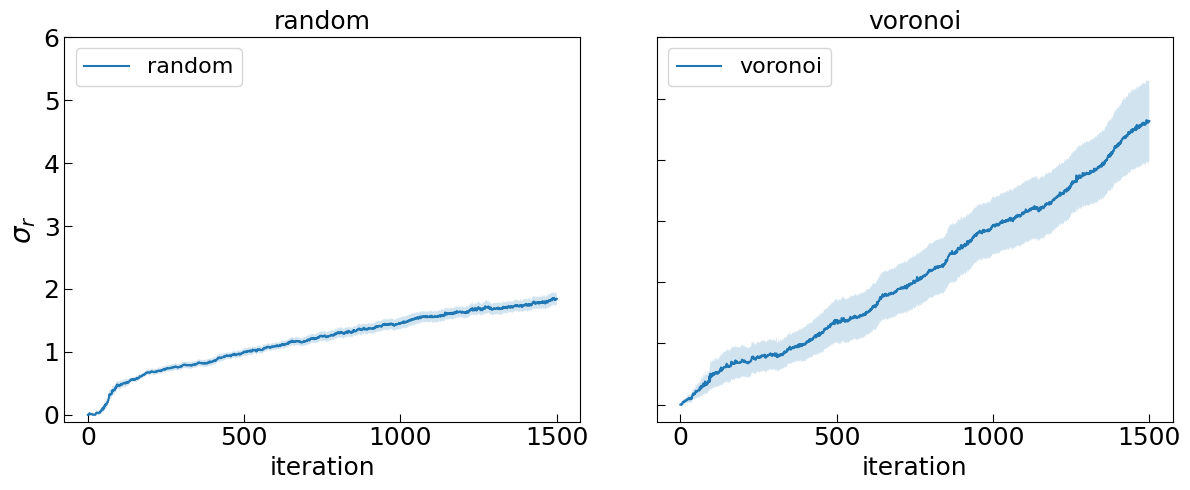

In [87]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title(titles[0], fontsize=18)

plot_with_CI(df['roughness'], df['roughness_conf'], label='random')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('$\sigma_r$', fontsize=20)
plt.tick_params(direction='in', size=6)
plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
plt.yticks(ticks=range(7), labels=range(7), fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.grid()
plt.subplot(122)

plot_with_CI(df_v['roughness'], df_v['roughness_conf'], label='voronoi')
plt.xlabel('iteration', fontsize=18)
plt.title(titles[1], fontsize=18)
plt.tick_params(direction='in', size=6)
plt.xticks(ticks=np.arange(0, 2000, 500), fontsize=18)
plt.yticks(ticks=range(7), labels=[], fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.grid()
plt.tight_layout(w_pad=5)
plt.savefig('roughness.png', dpi=300)
plt.show()

In [80]:
from scipy.optimize import curve_fit

fit_func = lambda x, a, b: a * x + b
skip = 100
popt, pcov = curve_fit(fit_func, xdata = range(100, len(df['radius'])), ydata=df['radius'][skip:])
velocity = popt[0]

print('fitted average velocity: ', velocity)

fitted average velocity:  0.011332906023329148


## Average growth velocity
Measured every 100 iterations by measuring the slope of the radial growth

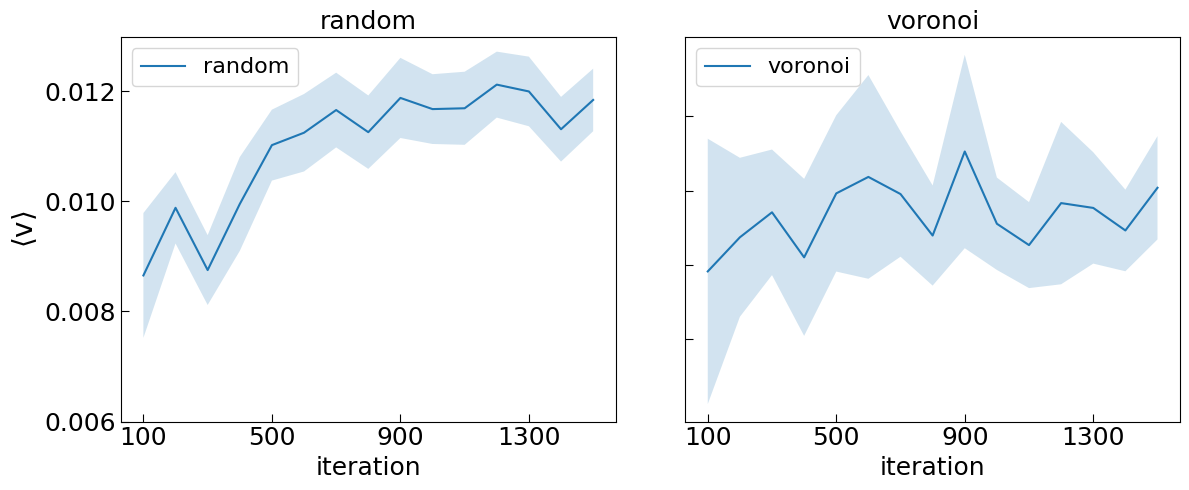

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title(titles[0], fontsize=18)
plot_with_CI(df['velocity'].dropna(), df['velocity_conf'].dropna(), label='random')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('$\langle$v$\\rangle$', fontsize=20)
plt.tick_params(direction='in', size=6)
plt.yticks(ticks=np.arange(0.006, 0.014, 0.002), fontsize=18)
plt.xticks(ticks=np.arange(0, 14, 4), labels=100*(1+np.arange(0, 14, 4)), fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.grid()

plt.subplot(122)
plt.title(titles[1], fontsize=18)
plot_with_CI(df_v['velocity'], df_v['velocity_conf'], label='voronoi')
plt.xlabel('iteration', fontsize=18)
plt.tick_params(direction='in', size=6)
plt.xticks(ticks=np.arange(0, 14, 4), labels=100*(1+np.arange(0, 14, 4)), fontsize=18)
plt.yticks(ticks=np.arange(0.006, 0.014, 0.002), labels=[], fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.grid()
plt.tight_layout(w_pad=5)
plt.savefig('velocity.png', dpi=300)